In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

# EDA

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


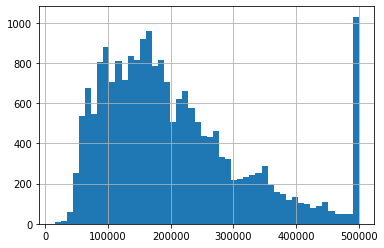

In [5]:
df['median_house_value'].hist(bins=50)

# Features

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df=df.drop(columns='ocean_proximity')

# Question 1

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

In [9]:
df['population'].median()

1166.0

### Split data

In [10]:
n=len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train= n- n_val - n_test
idx= np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [11]:
np.random.seed(42)
np.random.shuffle(idx)

In [12]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [13]:
df_train= df.iloc[idx[:n_train]]
df_val= df.iloc[idx[n_train:n_val+n_train]]
df_test= df.iloc[idx[n_val+n_train:]]
df_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19660,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0
4415,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0
18113,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0
17673,-121.88,37.30,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0
16992,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0
...,...,...,...,...,...,...,...,...,...
20011,-119.12,36.05,27.0,1575.0,321.0,1063.0,317.0,2.1477,53900.0
12225,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,93800.0
1051,-120.71,38.34,16.0,1257.0,231.0,559.0,213.0,4.4531,144300.0
14519,-117.13,32.91,16.0,2715.0,581.0,1619.0,584.0,4.0000,154700.0


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
12379,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
12380,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
12381,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
12382,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


In [16]:
y_train=np.log1p(df_train['median_house_value'])
y_val=np.log1p(df_val['median_house_value'])
y_test=np.log1p(df_test['median_house_value'])

In [17]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [18]:
y_train[10]

11.72157244693173

In [19]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
12379,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327
12380,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798
12381,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
12382,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566


Filling with zero

In [20]:
def prepare_X(df, fill_val):
    df= df.copy()
    df_num= df.fillna(fill_val)
    X= df_num.values
    return X

In [21]:
def train_linear_regression(X, y):
    ones= np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX_inv= np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [22]:
def rmse(y, y_pred):
    error=y-y_pred
    se= error**2
    mse= se.mean()
    return np.sqrt(mse)

In [23]:
X_train_zero=prepare_X(df_train, 0)
w0, w =train_linear_regression(X_train_zero, y_train)

w0, w

(-11.686975241778395,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [24]:
y_pred = w0 + X_train_zero.dot(w)
y_pred

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

In [25]:
rmse_train_zero=rmse(y_train, y_pred)
rmse_train_zero=round(rmse_train_zero, 2)
rmse_train_zero

0.34

Validate filling with zero

In [26]:
X_val_zero=prepare_X(df_val, 0)
w0, w =train_linear_regression(X_val_zero, y_val)

w0,w
y_val.shape

(4128,)

In [27]:
y_pred = w0 + X_val_zero.dot(w)
y_pred

array([11.4271174 , 12.08492484, 12.65737371, ..., 11.66285782,
       12.15616203, 12.24978789])

In [28]:
rmse_val_zero= rmse(y_val, y_pred)
rmse_val_zero=round(rmse_val_zero, 2)
rmse_val_zero

0.33

Filling with mean

In [29]:
X_train_mean=prepare_X(df_train, df_train.mean())
w0, w =train_linear_regression(X_train_mean, y_train)

w0, w

(-11.759590872518885,
 array([-2.76809637e-01, -2.82182103e-01,  2.93033801e-03, -1.48543785e-05,
         2.48054046e-04, -2.03763456e-04,  4.87004092e-04,  1.73086593e-01]))

In [30]:
y_pred = w0 + X_train_mean.dot(w)
y_pred

array([11.37346084, 11.97238956, 12.49872828, ..., 11.53551178,
       11.92115877, 12.54500627])

In [31]:
rmse_train_mean= rmse(y_train, y_pred)
rmse_train_mean= round(rmse_train_mean, 2)
rmse_train_mean

0.34

#### Validate filling with mean

In [32]:
X_val_mean=prepare_X(df_val, df_val.mean())
w0, w =train_linear_regression(X_val_mean, y_val)

w0, w

(-11.921458708103229,
 array([-2.77803590e-01, -2.82955852e-01,  3.82949787e-03, -4.11044539e-05,
         5.86610608e-04, -1.87359492e-04,  2.34267255e-04,  1.81648046e-01]))

In [33]:
y_pred = w0 + X_val_mean.dot(w)
y_pred

array([11.4271174 , 12.08492484, 12.65737371, ..., 11.66285782,
       12.15616203, 12.24978789])

In [34]:
rmse_val_mean= rmse(y_val, y_pred)
rmse_val_mean= round(rmse_val_mean, 2)
rmse_val_mean

0.33

# Question 4

In [35]:
def prepare_X(df, fill_val):
    df= df.copy()
    df_num= df.fillna(fill_val)
    X= df_num.values
    return X

In [36]:
def train_linear_regression_reg(X, y, r):
    ones= np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX= XTX + r* np.eye(XTX.shape[0]) 
    XTX_inv= np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [37]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_val_zero=prepare_X(df_val, 0)
    w0, w =train_linear_regression_reg(X_val_zero, y_val, r)
    
    y_pred = w0 + X_val_zero.dot(w)
    y_pred
    rmse_score=rmse(y_val, y_pred)
    rmse_score=round(rmse_score,2)

    print (r, " ", rmse_score)

0   0.33
1e-06   0.33
0.0001   0.33
0.001   0.33
0.01   0.33
0.1   0.33
1   0.34
5   0.34
10   0.34


# Question 5

In [38]:
n=len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train= n- n_val - n_test

idx= np.arange(n)

collect_scores=[]
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(i)
    np.random.shuffle(idx)
    
    df_train1= df.iloc[idx[:n_train]]
    df_val1= df.iloc[idx[n_train:n_val+n_train]]
    df_test1= df.iloc[idx[n_val+n_train:]]
    
    y_train1=np.log1p(df_train1['median_house_value'])
    y_val1=np.log1p(df_val1['median_house_value'])
    y_test1=np.log1p(df_test1['median_house_value'])
    
    del df_train1['median_house_value']
    del df_val1['median_house_value']
    del df_test1['median_house_value']
    
    X_val_zero1=prepare_X(df_val1, 0)
    w0, w =train_linear_regression(X_val_zero1, y_val1)
    
    y_pred1 = w0 + X_val_zero1.dot(w)
    rmse_score1=rmse(y_val1, y_pred1)
    rmse_score1=round(rmse_score1,2)
    collect_scores.append(rmse_score1)
    print (i, " ", rmse_score1)
print (round(np.std(collect_scores), 3)) 
print(collect_scores)

0   0.34
1   0.34
2   0.35
3   0.34
4   0.35
5   0.34
6   0.34
7   0.34
8   0.34
9   0.34
0.004
[0.34, 0.34, 0.35, 0.34, 0.35, 0.34, 0.34, 0.34, 0.34, 0.34]


# Question 6